

# Project: Investigate a Dataset - No Show Appointments

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

The Dataset Collects Information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. A number of characteristics about the patient are included in each row.

● ‘ScheduledDay’ tells us on what day the patient set up their appointment.

● ‘Neighborhood’ indicates the location of the hospital.

● ‘Scholarship’ indicates whether or not the patient is enrolled in Brasilian welfare program Bolsa Família.

● ‘No_show’ it says ‘No’ if the patient showed up to their appointment, and ‘Yes’ if they did not show up.


### Question(s) for Analysis

#  1- Is there a difference the average age of patient who miss appointments and those who do not?

#  2- Is the difference on gender makes difference on number of patient who miss apointment and those who not ?

In [40]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

% matplotlib inline

In [2]:
# Upgrade pandas to use dataframe.explode() function. 
!pip install --upgrade pandas==0.25.0

Requirement already up-to-date: pandas==0.25.0 in /opt/conda/lib/python3.6/site-packages (0.25.0)


<a id='wrangling'></a>
## Data Wrangling




### General Properties


In [41]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [42]:
df.shape

(110527, 14)

In [43]:
# check for null values 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [44]:
# check for duplicate 
sum(df.duplicated())

0

In [45]:
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No



### Data Cleaning


In [46]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.
# clean the dataset from the unimportant column
new_appointment_data = df.drop(['PatientId','ScheduledDay','SMS_received','AppointmentID','AppointmentDay'], axis = 1)
new_appointment_data.head()

,Gender,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,No-show
0,F,62,JARDIM DA PENHA,0,1,0,0,0,No
1,M,56,JARDIM DA PENHA,0,0,0,0,0,No
2,F,62,MATA DA PRAIA,0,0,0,0,0,No
3,F,8,PONTAL DE CAMBURI,0,0,0,0,0,No
4,F,56,JARDIM DA PENHA,0,1,1,0,0,No


In [47]:
# check the info of the dataset after cleaning
new_appointment_data.isnull().sum()

Gender           0
Age              0
Neighbourhood    0
Scholarship      0
Hipertension     0
Diabetes         0
Alcoholism       0
Handcap          0
No-show          0
dtype: int64

In [48]:
new_appointment_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 9 columns):
Gender           110527 non-null object
Age              110527 non-null int64
Neighbourhood    110527 non-null object
Scholarship      110527 non-null int64
Hipertension     110527 non-null int64
Diabetes         110527 non-null int64
Alcoholism       110527 non-null int64
Handcap          110527 non-null int64
No-show          110527 non-null object
dtypes: int64(6), object(3)
memory usage: 7.6+ MB


<a id='eda'></a>
## Exploratory Data Analysis



# Is there a difference the average age of patient who miss appointments and those who do not?

In [49]:
# Use this, and more code cells, to explore your data. Don't forget to add
#   Markdown cells to document your observations and findings.
new_appointment_data.describe()

,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap
count,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248
std,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543
min,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000


In [50]:
# changing negative in age column to positive
meanAge = new_appointment_data['Age'].mean()
new_appointment_data[new_appointment_data['Age'] < 0] = meanAge


### Research Question 2  (Replace this header name!)

In [51]:
# Continue to explore the data to address your additional research
#   questions. Add more headers as needed if you have more questions to
#   investigate.
new_appointment_data.describe()

,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap
count,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,37.089219,0.098601,0.197581,0.072200,0.030735,0.022584
std,23.109921,0.317789,0.413104,0.281244,0.204698,0.196282
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,115.000000,37.088874,37.088874,37.088874,37.088874,37.088874


In [52]:
new_appointment_data.rename(columns = {'No-show':'No_show'}, inplace = True)

# 20% of patients not show up to their appointment

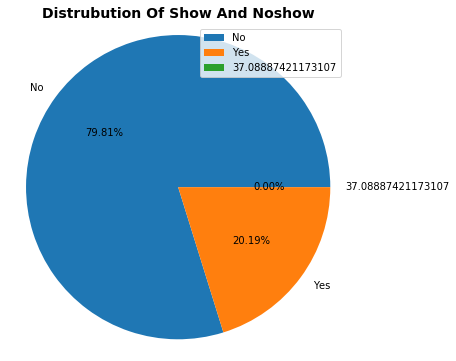

In [53]:
# make pie chart to determine the precentage of shown up their appointment and precentage ofnot
def myPiechart (dataX,xVar,title):
    dataX[xVar].value_counts().plot.pie(figsize=(6,6),autopct='%.2f%%')
    plt.title(title.title(), fontsize = 14 , weight = 'bold')
    
    plt.ylabel('')
    
    plt.axis('equal');
    
    plt.legend();
    
    
myPiechart(new_appointment_data,'No_show','Distrubution of show and Noshow')  

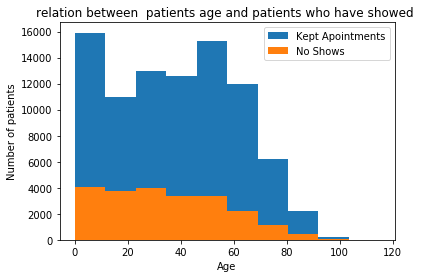

Kept Appointments Mean Age:37.79
Missed Appointments Mean Age:34.32


In [54]:
kept = (new_appointment_data.No_show == 'No')
noshows = (new_appointment_data.No_show == 'Yes')

new_appointment_data[kept].Age.plot.hist()
new_appointment_data[noshows].Age.plot.hist()
plt.xlabel("Age")
plt.ylabel("Number of patients")
plt.title("relation between  patients age and patients who have showed ")
plt.legend(['Kept Apointments', 'No Shows'])
plt.show()

print('Kept Appointments Mean Age:{:.2f}'.format(new_appointment_data[kept].Age.mean()))
print('Missed Appointments Mean Age:{:.2f}'.format(new_appointment_data[noshows].Age.mean()))

The Average patients Age who kept the appointments are larger than who missed it

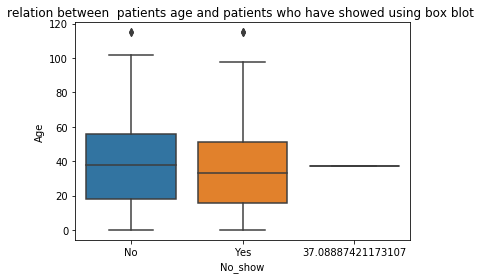

In [55]:
sns.boxplot(x=new_appointment_data.No_show, y=new_appointment_data.Age)
plt.title("relation between  patients age and patients who have showed using box blot ")
plt.show()

# Is the difference on gender makes difference on number of patient who miss apointment and those who not ?

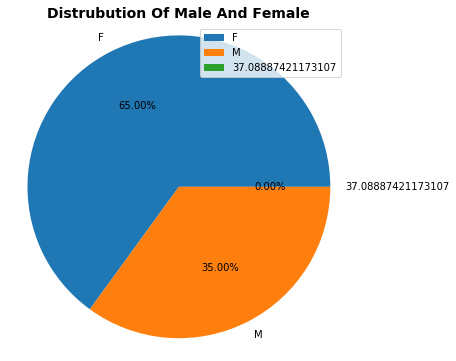

In [56]:
    
myPiechart(new_appointment_data,'Gender','Distrubution of male and female')  

Females patients are more than males 

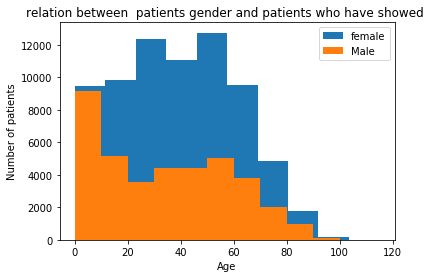

female Mean Age:38.89
Male Mean Age:33.74


In [57]:
male = (new_appointment_data.Gender == 'M')
female = (new_appointment_data.Gender == 'F')

new_appointment_data[female].Age.plot.hist()
new_appointment_data[male].Age.plot.hist()
plt.xlabel("Age")
plt.ylabel("Number of patients")
plt.title("relation between  patients gender and patients who have showed ")
plt.legend(['female', 'Male'])
plt.show()
print('female Mean Age:{:.2f}'.format(new_appointment_data[female].Age.mean()))
print('Male Mean Age:{:.2f}'.format(new_appointment_data[male].Age.mean()))


#The average age and quartiles are slightly lower for NoShows
The Average Female age is 38 and average Kept appointment is 37  so females mean age is nearest to average kept appointment 

<a id='conclusions'></a>
## Conclusions

Results : our data suggest that 

1- there is no gap in Ages Between patients who missed the appointment and who kept it 

2- Females have kept their appiontments larger than males

3- Females on average are older than males

### Limitations

We don't have strong colleration that said females kept their appointments more than mens it's weak as females already are more than males so they have the chance to kept appointment or missed it more than males

## Submitting your Project 



In [58]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0